# Building a CNN to classify images in the CIFAR-10 Dataset
We will work with the CIFAR-10 Dataset. This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
For details about CIFAR-10 see: https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

Building Convolutional Neural Nets
In this exercise we will build and train our first convolutional neural networks. In the first part, we walk through the different layers and how they are configured. In the second part, you will build your own model, train it, and compare the performance.

## Building Convolutional Neural Nets 
In this exercise we will build and train our first convolutional neural networks. In the first part, we walk through the different layers and how they are configured. In the second part, you will build your own model, train it, and compare the performance.

In [49]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
from utils import load_data

def get_data(num_training=27709, num_validation=1000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
        
#     # Subsample the data
#     mask = list(range(num_training, num_training + num_validation))
#     X_val = X_train[mask]
#     y_val = y_train[mask]
#     mask = list(range(num_training))
#     X_train = X_train[mask]
#     y_train = y_train[mask]
#     mask = list(range(num_pub_test))
#     X_pub_test = X_pub_test[mask]
#     y_pub_test = y_pub_test[mask]
#     mask = list(range(num_pri_test))
#     X_pri_test = X_pri_test[mask]
#     y_pri_test = y_pri_test[mask]

#     # Normalize the data: subtract the mean image
#     mean_image = np.mean(X_train, axis=0)
#     X_train -= mean_image
#     X_val -= mean_image
#     X_pub_test -= mean_image
#     X_pri_test -= mean_image
# #     X_train /= np.std(X_train, axis = 0)
# #     X_val /= np.std(X_val, axis = 0)
# #     X_pub_test /= np.std(X_pub_test, axis = 0)
# #     X_pri_test /= np.std(X_pri_test, axis = 0)

#     # Reshape data to rows
#     X_train = X_train.reshape(num_training, -1)
#     X_val = X_val.reshape(num_validation, -1)
#     X_pub_test = X_pub_test.reshape(num_pub_test, -1)
#     X_pri_test = X_pri_test.reshape(num_pri_test, -1)
#    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test
    return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
#X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
# print('Validation data shape: ', X_val.shape)
# print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Clear previously loaded data.
Train data shape:  (28709, 48, 48)
Train labels shape:  (28709,)
Public test data shape:  (3589, 48, 48)
Public test labels shape:  (3589,)
Private test data shape:  (3589, 48, 48)
Private test labels shape:  (3589,)


In [51]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_pub_test.shape[0], 'test samples')
print(X_pri_test.shape[0], 'test samples')

x_train shape: (28709, 48, 48)
28709 train samples
3589 test samples
3589 test samples


In [52]:
## Each image is a 32 x 32 x 3 numpy array
print(X_train[444].shape)
print(X_train[444])

(48, 48)
[[237. 237. 228. ...  23.  25.  28.]
 [238. 233. 227. ...  29.  34.  37.]
 [238. 231. 227. ...  39.  41.  45.]
 ...
 [117.  18.  39. ...  96.  43.  29.]
 [117.  22.  36. ...  91.  38.  27.]
 [115.  25.  34. ...  82.  40.  25.]]


3


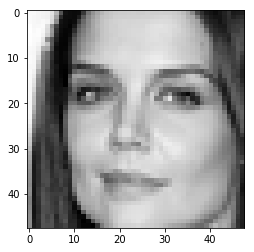

In [53]:
print(y_train[444])
plt.imshow(X_train[444], cmap='Greys_r');

In [54]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(X_train.shape, 'train samples')
print(X_pub_test.shape, 'public test samples')
print(X_pri_test.shape, 'private test sample')

(28709, 48, 48) train samples
(3589, 48, 48) public test samples
(3589, 48, 48) private test sample


In [55]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
X_train = X_train.reshape(len(X_train), 48*48)
X_pub_test = X_pub_test.reshape(len(X_pub_test), 48*48)
X_pri_test = X_pri_test.reshape(len(X_pri_test), 48*48)


# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')

X_train /= 255
X_pub_test /= 255
X_pri_test /= 255

In [56]:
num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [61]:
### Build your model here
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(2304,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(7, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               922000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 2107      
Total params: 1,044,407
Trainable params: 1,044,407
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Let's compile the model
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [64]:
# And now let's fit.

batch_size = 150  # mini-batch with 128 examples
epochs = 40
history = model_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_pub_test, y_pub_test))

Train on 28709 samples, validate on 3589 samples
Epoch 1/40
28709/28709 [==============================] - 4s 155us/step - loss: 1.7300 - acc: 0.3097 - val_loss: 1.7226 - val_acc: 0.3422
Epoch 2/40
28709/28709 [==============================] - 5s 161us/step - loss: 1.7246 - acc: 0.3125 - val_loss: 1.7102 - val_acc: 0.3282
Epoch 3/40
28709/28709 [==============================] - 4s 150us/step - loss: 1.7214 - acc: 0.3143 - val_loss: 1.7072 - val_acc: 0.3555
Epoch 4/40
28709/28709 [==============================] - 4s 145us/step - loss: 1.7208 - acc: 0.3100 - val_loss: 1.6995 - val_acc: 0.3151
Epoch 5/40
28709/28709 [==============================] - 4s 144us/step - loss: 1.7153 - acc: 0.3168 - val_loss: 1.6951 - val_acc: 0.3480
Epoch 6/40
28709/28709 [==============================] - 4s 143us/step - loss: 1.7102 - acc: 0.3173 - val_loss: 1.7211 - val_acc: 0.2979
Epoch 7/40
28709/28709 [==============================] - 4s 144us/step - loss: 1.7076 - acc: 0.3202 - val_loss: 1.7061 - v

In [65]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_2.evaluate(X_pri_test, y_pri_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.661073038391364
Test accuracy: 0.3530231262231544


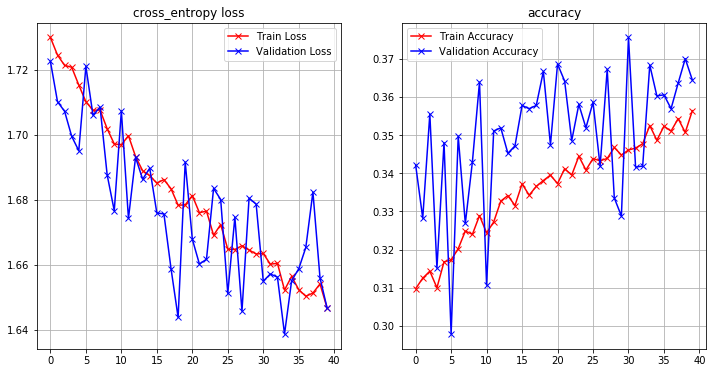

In [66]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)